In [1]:
using Printf

######################################################################################################
### a) The trick here is to turn 15! orderings to 2^15 subsets and use dynamic programing.
### b) The observation is that if I have a set of prefix operations plus one "last" operation,
###    --- The maximum value is related to either the maximum or the minimum possible value of the
###        prefix operations.
### c) This leads to a rather naiive dyanmic programming solution
######################################################################################################

function tadd(a::Tuple{BigInt,BigInt},b::Int64)
    return (a[1]+b*a[2],a[2])
end

function tsub(a::Tuple{BigInt,BigInt},b::Int64)
    return (a[1]-b*a[2],a[2])
end

function tmul(a::Tuple{BigInt,BigInt},b::Int64)
    return (a[1]*b,a[2])
end

function tdiv(a::Tuple{BigInt,BigInt},b::Int64)
    return b < 0 ? (-a[1],a[2]*(-b)) : (a[1],a[2]*b)
end

function tgt(a::Tuple{BigInt,BigInt},b::Tuple{BigInt,BigInt})
    return b[2]*a[1] > a[2]*b[1]
end

function tlt(a::Tuple{BigInt,BigInt},b::Tuple{BigInt,BigInt})
    return b[2]*a[1] < a[2]*b[1]
end


function main(infn="")
    infile = (infn != "") ? open(infn,"r") : length(ARGS) > 0 ? open(ARGS[1],"r") : stdin
    tt = parse(Int64,readline(infile))
    for qq in 1:tt
        print("Case #$qq: ")
        S,C = [parse(Int64,x) for x in split(rstrip(readline(infile)))]
        ops = Vector{Tuple{Char,Int64}}()
        for i in 1:C
            aa = split(rstrip(readline(infile)))
            op = aa[1][1]
            val = parse(Int64,aa[2])
            push!(ops,(op,val))
        end

        minvals = resize!(Vector{Tuple{BigInt,BigInt}}(),2^C)
        maxvals = resize!(Vector{Tuple{BigInt,BigInt}}(),2^C)
        minvals[1] = maxvals[1] = (BigInt(S),BigInt(1))
        #print("\n")
        for i in 2:2^C
            first = true
            bitmask = i-1
            for j in 1:C
                bm = 1 << (j-1)
                if bitmask & bm == 0; continue; end
                residual = bitmask & ~bm + 1
                v1,v2 = (BigInt(0),BigInt(1)),(BigInt(0),BigInt(1))
                if ops[j][1] == '+'
                    v1 = tadd(maxvals[residual],ops[j][2])
                    v2 = tadd(minvals[residual],ops[j][2])
                elseif ops[j][1] == '-'
                    v1 = tsub(maxvals[residual],ops[j][2])
                    v2 = tsub(minvals[residual],ops[j][2])
                elseif ops[j][1] == '*'
                    v1 = tmul(maxvals[residual],ops[j][2])
                    v2 = tmul(minvals[residual],ops[j][2])
                else ops[j][1] == '/'
                    v1 = tdiv(maxvals[residual],ops[j][2])
                    v2 = tdiv(minvals[residual],ops[j][2])
                end
                (maxv,minv) = tgt(v1,v2) ? (v1,v2) : (v2,v1)
                if first
                    maxvals[i] = maxv
                    minvals[i] = minv
                    first = false
                else
                    maxvals[i] = tgt(maxvals[i],maxv) ? maxvals[i] : maxv
                    minvals[i] = tlt(minvals[i],minv) ? minvals[i] : minv
                end
                #print("DEBUG: $i $bitmask $bm $(j-1) $(ops[j][1]) $(ops[j][2]) v1:($v1) v2:($v2) maxvals[i]:($(maxvals[i])) minvals[i]:($(minvals[i]))\n")

            end
        end
        ans = maxvals[2^C][1]//maxvals[2^C][2]
        print("$(numerator(ans)) $(denominator(ans))\n")
    end
end

main (generic function with 2 methods)

In [3]:
using Profile, ProfileSVG, ProfileVega

Case #1: -1 1
Case #2: -3 2
Case #3: 1000000000000000000000000 1
Case #4: 1 1
Case #5: 0 1
Case #1: 11448987486508929377154082067 1772559360
Case #2: 11898395950988571833056996 8310165861
Case #3: 184449631085236764648 274369375
Case #4: 25784062282936176315525 27473
Case #5: 507780237323376589 586845
Case #6: 1774352031395198601229 109900900
Case #7: 1752637497177600 131
Case #8: 564151155642157256045599 2804904062982000
Case #9: 65723549772324959647745485320 4449747259
Case #10: 33729205513564951520 737429
Case #11: 1041684513619381507874560653 88264
Case #12: 124345860809924321850418344000 1120571
Case #13: 61013980218511169202 2974697
Case #14: 40119666917296 165
Case #15: 10589480908679455 1104
Case #16: 606159793985221501416 40145
Case #17: 8967079012924567711 456319881180
Case #18: 740860830979277229 34410992000
Case #19: 49298594005655778080 6830903
Case #20: 284539140273186952920 3110147
Case #21: 113207919140292955223 2904100
Case #22: 1185073226041186591 20174976
Case #23: 1

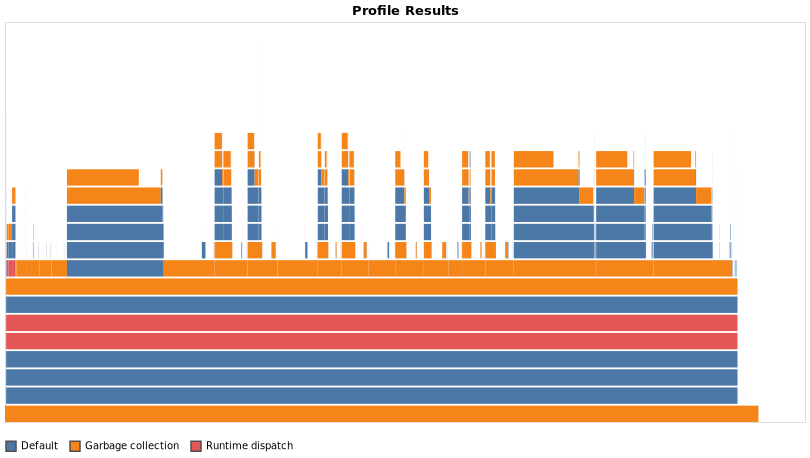

In [4]:
@profile main("/home/debr/codejams/julia/work/2017/WF/B.in")
Profile.clear()
@profile main("/home/debr/codejams/julia/work/2017/WF/B.in2")
ProfileVega.view()